In [65]:
import numpy
from sklearn.decomposition import PCA

In [76]:
data = numpy.genfromtxt("embed.csv", delimiter=',')
data = data[1:,1:] # remove header and key
data

array([[ 0.09760676, -0.14920732,  0.74543107, ..., -0.61055446,
         0.08148197, -0.01054963],
       [-0.43230146,  0.07460136, -0.09639949, ...,  0.32398641,
         0.46255794, -0.11978531],
       [-0.25557846, -0.19170403,  0.1969735 , ..., -0.220999  ,
         0.08919775, -0.07394783],
       ...,
       [-0.54036117, -0.14884144,  0.58181053, ...,  0.80818439,
        -0.34736744,  0.25992626],
       [-0.61397213,  0.68746871,  0.11992905, ...,  0.13301747,
         0.08155062,  0.15702982],
       [-0.16049773,  0.3809979 ,  0.74996722, ...,  0.37122065,
        -0.21450204,  0.34045345]])

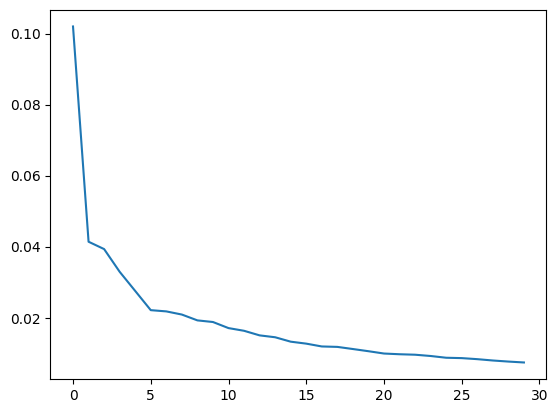

In [84]:
import matplotlib.pyplot as plt
plt.plot(PCA(30).fit(data).explained_variance_ratio_)

In [69]:
pca = PCA(n_components=100)
data_r = pca.fit(data).transform(data)

In [70]:
sum(pca.explained_variance_ratio_)


np.float64(0.840901230681723)

/var/folders/11/g2cjsm2j5t36_244f2jycf2m0000gn/T/ipykernel_57951/1170278953.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", shadow=False, scatterpoints=1)


Text(0.5, 1.0, 'PCA of Ramdam dataset')

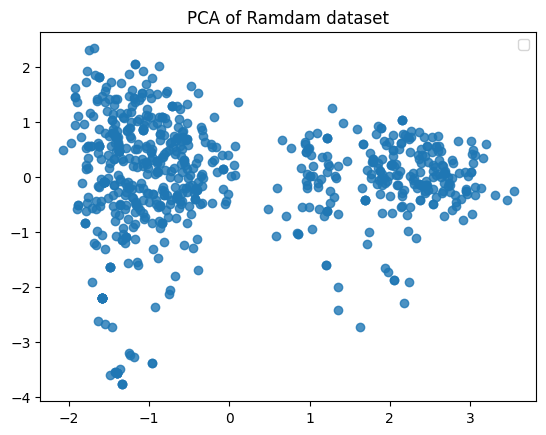

In [71]:
import matplotlib.pyplot as plt
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
plt.scatter(data_r[:,0], data_r[:,1], alpha=0.8)
# plt.vlines(0.2, -5, 5)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Ramdam dataset")

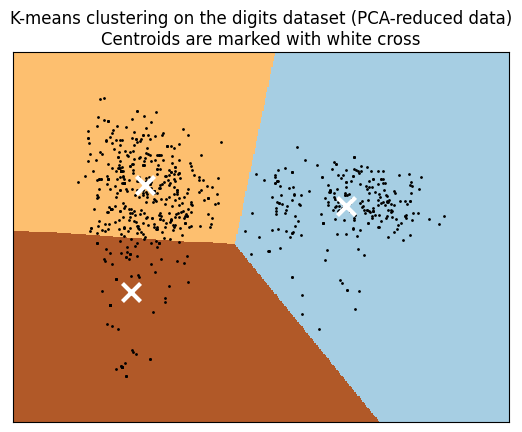

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(numpy.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [73]:
import pandas
data = pandas.read_csv('data.csv')
data['clusters'] = kmeans.predict(reduced_data)

In [74]:
data.to_csv('clusters.csv')

In [81]:
# more clusters
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4)
kmeans.fit(data)

KMeans(n_clusters=10, n_init=4)

In [83]:
kmeans.predict(data)

array([3, 6, 9, 5, 7, 8, 2, 7, 8, 6, 3, 1, 7, 7, 1, 1, 1, 1, 1, 1, 2, 0,
       7, 7, 5, 8, 9, 3, 8, 3, 7, 1, 8, 2, 0, 7, 8, 4, 7, 3, 5, 7, 5, 7,
       8, 8, 8, 2, 7, 8, 3, 7, 8, 5, 0, 5, 8, 7, 6, 9, 2, 0, 2, 5, 7, 6,
       0, 8, 6, 8, 1, 5, 4, 1, 7, 7, 7, 4, 1, 2, 4, 7, 7, 8, 8, 1, 6, 7,
       8, 7, 9, 6, 8, 3, 6, 8, 9, 0, 1, 3, 0, 7, 6, 9, 2, 7, 3, 0, 1, 7,
       8, 6, 7, 5, 6, 0, 4, 7, 7, 8, 0, 3, 0, 6, 3, 8, 9, 9, 6, 5, 9, 5,
       6, 7, 8, 2, 7, 7, 7, 1, 5, 6, 0, 8, 9, 7, 2, 9, 7, 9, 4, 8, 7, 7,
       8, 3, 8, 6, 1, 7, 9, 1, 7, 7, 6, 7, 3, 1, 3, 8, 1, 5, 5, 6, 6, 7,
       7, 0, 9, 1, 9, 6, 7, 1, 4, 1, 6, 3, 8, 0, 4, 3, 9, 3, 8, 7, 7, 9,
       0, 5, 1, 1, 7, 6, 2, 6, 8, 7, 7, 1, 7, 5, 9, 5, 4, 6, 3, 8, 7, 3,
       1, 9, 8, 5, 4, 5, 3, 1, 3, 7, 7, 0, 5, 2, 5, 9, 4, 6, 8, 5, 3, 6,
       1, 7, 6, 9, 7, 1, 7, 3, 7, 4, 7, 6, 7, 0, 3, 5, 1, 9, 4, 6, 7, 3,
       2, 8, 4, 7, 9, 5, 7, 1, 6, 5, 6, 6, 3, 9, 6, 9, 9, 8, 3, 0, 3, 8,
       6, 5, 5, 0, 7, 3, 8, 9, 2, 9, 7, 5, 9, 4, 2,